<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Evolution-of-agents-scores" data-toc-modified-id="Evolution-of-agents-scores-1">Evolution of agents scores</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1.1">Imports</a></span></li><li><span><a href="#Code" data-toc-modified-id="Code-1.2">Code</a></span></li><li><span><a href="#Analysis-at-03/07/2021" data-toc-modified-id="Analysis-at-03/07/2021-1.3">Analysis at 03/07/2021</a></span></li></ul></li></ul></div>

# Evolution of agents scores

Let's plot how the agents scores have been improving over time.

## Imports

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import seaborn as sns

%config Completer.use_jedi = False

In [15]:
plt.plot()
plt.close('all')
plt.rcParams["figure.figsize"] = (30, 10)  
mpl.rcParams['lines.linewidth'] = 3
mpl.rcParams['font.size'] = 16

## Code

In [20]:
def plot_local_vs_kaggle_scores(df_local, df_kaggle):
    unique_kaggle_agents = df_kaggle.fileName.unique()
    local_scores, kaggle_scores = [], []
    for agent, elo_score in zip(df_local.model, df_local.ranking):
        if agent in unique_kaggle_agents:
            scores = df_kaggle[df_kaggle.fileName == agent].publicScore.values.tolist()
            kaggle_scores.extend(scores)
            local_scores.extend([elo_score]*len(scores))
            
    #plt.scatter(local_scores, kaggle_scores, alpha=0.5)
    sns.regplot(x=local_scores, y=kaggle_scores, truncate=False)
    plt.xlabel('local elo score')
    plt.ylabel('kaggle leaderboard score')
    plt.grid()

## Analysis at 03/07/2021

In [11]:
df_local = pd.read_csv('../data/elo_ranking.csv')
df_kaggle = pd.read_csv('../data/kaggle_submissions_20210703.csv')

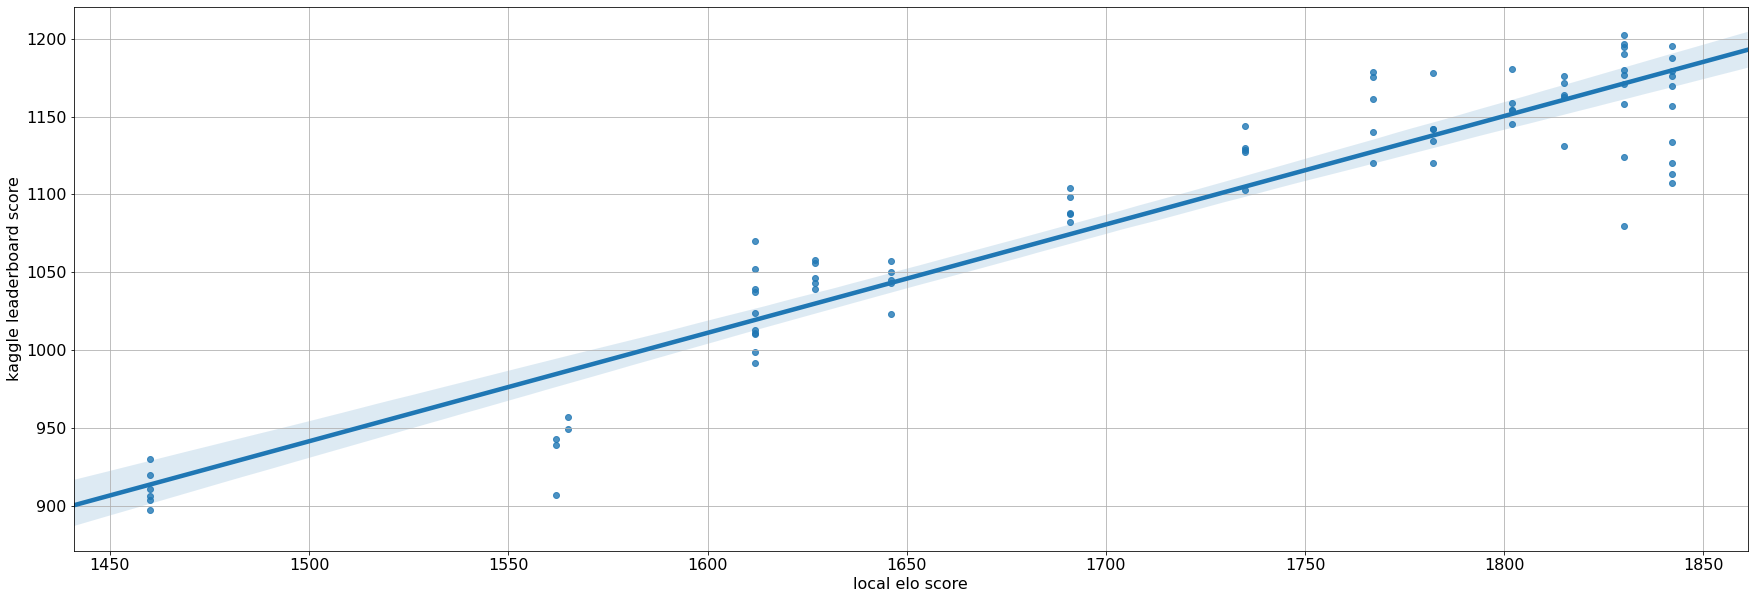

In [21]:
plot_local_vs_kaggle_scores(df_local, df_kaggle)

- We can see that the is a pretty good correlation betweeen local and leaderboard score. It is not perfect, but the relation is clear.
- Also we can see how wide the distribution of scores can be for the same agent

In [27]:
df_kaggle.groupby('fileName').mean().sort_values('publicScore', ascending=False)

,publicScore
fileName,
antonino,1167.320000
adriano,1161.000000
trajano,1158.540000
tiberio,1155.060000
nerva,1153.790000
aurelio,1143.260000
centurion,1126.340000
decurion,1125.360000
sylvester,1099.520000
